# 1. Importing Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

# 2. Creating a Synthetic Dataset

In [14]:
X,y = make_blobs(n_samples=1000, centers=2, cluster_std=2, random_state=42)

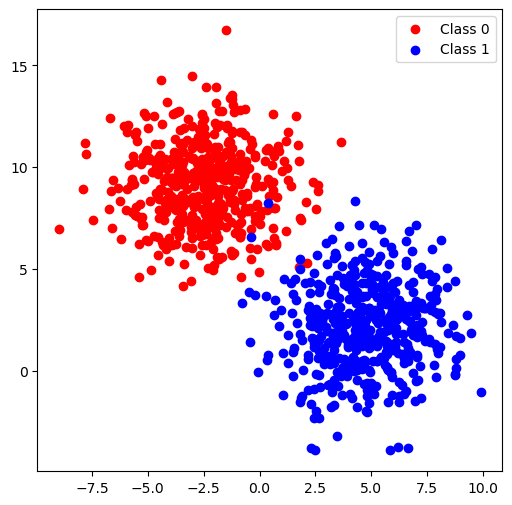

In [15]:
# Plot the dataset
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')
plt.legend()
plt.show()

# 3. Train-Test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# 4. Implementing Neural Network

In [28]:
class NeuralNetwork:
    def __init__(self,input_size,hidden_size_1,hidden_size_2,output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size_1 = hidden_size_1
        self.hidden_size_2 = hidden_size_2
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.train_loss = []
        self.test_loss = []
            
        # PARAMETER INITIALIZATION
        # for layer-1
        self.weights1 = np.random.randn(self.input_size,self.hidden_size_1) * 0.01
        self.biases1 = np.zeros((1,self.hidden_size_1))
        
        # for layer-2
        self.weights2 = np.random.randn(self.hidden_size_1,self.hidden_size_2) * 0.01
        self.biases2 = np.zeros((1,self.hidden_size_2))
        
        # for output-layer
        self.weights3 = np.random.randn(self.hidden_size_2,self.output_size) * 0.01
        self.biases3 = np.zeros((1,self.output_size))
        
    def __str__(self):
        return f"Neural Network Layout:\n\nInput Layer: {self.input_size} neurons\nHidden Layer 1: {self.hidden_size_1} neurons\nHidden Layer 2: {self.hidden_size_2} neurons\nOutput Layer: {self.output_size} neurons\nLoss Function: BCE"
    
    def sigmoid(self,x):
        x = np.clip(x,-500,500)
        return 1 / (1 + np.exp(-x))
    
    def relu(self,x):
        return np.maximum(0,x)
    
    def relu_derivative(self,x):
        return np.where(x>0,1,0)
    
    def log_loss(self,y_true,y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred,epsilon,1-epsilon)
        return -np.mean(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))
    
    def forward(self,X):
        # input -> layer-1
        self.z1 = np.dot(X,self.weights1) + self.biases1
        self.a1 = self.relu(self.z1)
        
        # layer-1 -> layer-2
        self.z2 = np.dot(self.a1,self.weights2) + self.biases2
        self.a2 = self.relu(self.z2)
        
        # layer-2 -> output-layer
        self.z3 = np.dot(self.a2,self.weights3) + self.biases3
        self.a3 = self.relu(self.z3)
        
        # return output
        return self.a3
    
    def backpropagate(self,X,y):
        m = X.shape[0]
        
        # output layer error
        dz3 = self.a3 - y.reshape(-1,1)
        dw3 = np.dot(self.a2.T, dz3) / m
        db3 = np.sum(dz3, axis=0, keepdims=True) / m
        
        # Layer 2 error
        dz2 = np.dot(dz3,self.weights3.T) * self.relu_derivative(self.z2)
        dw2 = np.dot(self.a1.T,dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) /m
        
        # Layer 1 error
        dz1 = np.dot(dz2, self.weights2.T) * self.relu_derivative(self.z1)
        dw1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        # Updating parameters using Gradient Descent
        self.weights3 -= self.learning_rate * dw3
        self.biases3 -= self.learning_rate * db3
        self.weights2 -= self.learning_rate * dw2
        self.biases2 -= self.learning_rate * db2
        self.weights1 -= self.learning_rate * dw1
        self.biases1 -= self.learning_rate * db1
        
    def train(self,X,y,epochs=100):
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)
            
            # Compute Loss
            loss = self.log_loss(y,y_pred)
            self.train_loss.append(loss)
            
            # Backpropagation
            self.backpropagate(X,y)
            
            if epoch % 10 == 0:
                print(f"Epoch: {epoch} | Train Loss: {loss}")
    
    def test(self,X,y,epochs=100):
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)

            # Compute Loss
            loss = self.log_loss(y,y_pred)
            self.test_loss.append(loss)
            
            if epoch % 10 == 0:
                print(f"Epoch: {epoch} | Test Loss: {loss}")

# 5. Instantiating the Neural Network Class

In [35]:
NN = NeuralNetwork(input_size=2,hidden_size_1=4,hidden_size_2=3,output_size=1)
print(NN)

Neural Network Layout:

Input Layer: 2 neurons
Hidden Layer 1: 4 neurons
Hidden Layer 2: 3 neurons
Output Layer: 1 neurons
Loss Function: BCE


# 6. Training and Testing

In [36]:
NN.train(X_train,y_train,epochs=100)

Epoch: 0 | Train Loss: 5.681105594268246
Epoch: 10 | Train Loss: 1.5522064957884611
Epoch: 20 | Train Loss: 1.2510224587262944
Epoch: 30 | Train Loss: 1.0930568534491465
Epoch: 40 | Train Loss: 0.9927655657096804
Epoch: 50 | Train Loss: 0.9233539115277183
Epoch: 60 | Train Loss: 0.8729041741101693
Epoch: 70 | Train Loss: 0.8350771606452255
Epoch: 80 | Train Loss: 0.8061069548664164
Epoch: 90 | Train Loss: 0.7835820063291803


In [37]:
NN.test(X_test,y_test,epochs=100)

Epoch: 0 | Test Loss: 0.7516883426962438
Epoch: 10 | Test Loss: 0.7516883426962438
Epoch: 20 | Test Loss: 0.7516883426962438
Epoch: 30 | Test Loss: 0.7516883426962438
Epoch: 40 | Test Loss: 0.7516883426962438
Epoch: 50 | Test Loss: 0.7516883426962438
Epoch: 60 | Test Loss: 0.7516883426962438
Epoch: 70 | Test Loss: 0.7516883426962438
Epoch: 80 | Test Loss: 0.7516883426962438
Epoch: 90 | Test Loss: 0.7516883426962438


# 7. Plotting graphs

In [38]:
epochs = []
for i in range(100):
    epochs.append(i)

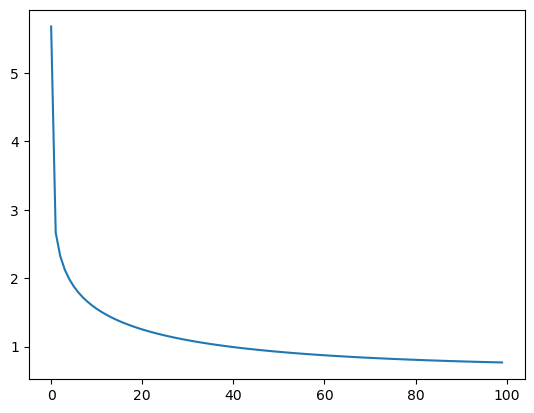

In [39]:
plt.plot(epochs,NN.train_loss)

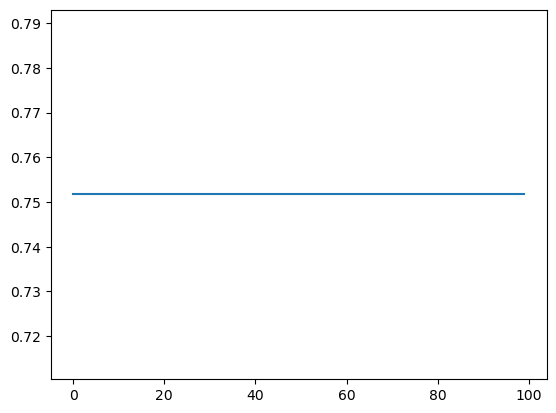

In [40]:
plt.plot(epochs,NN.test_loss)